In [99]:
#necessary packages
!pip install pandas
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib

In [19]:
#standard imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [18]:
#load dataset with pandas
churn_df = pd.read_csv(r'C:\Users\danie\Downloads\hfy4k43ojf892f0dy7sd (1)\churn_raw_data.csv')

In [17]:
#Display churn dataframe
churn_df


,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [21]:
# List of Dataframe Columns
df = churn_df.columns
print(df)


Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')


In [23]:
 # Remove redundant "Unnamed" column at beginning & display first five records
df = churn_df.drop(churn_df.columns[0], axis = 1)
df.head()


,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [27]:
# Rename last 8 survey columns for better description of variables
df.rename(columns = {'item1':'Responses',
'item2':'Fixes',
'item3':'Replacements',
'item4':'Reliability',
'item5':'Options',
'item6':'Respectfulness',
'item7':'Courteous',
'item8':'Listening'},
inplace=True)


In [28]:
# Find number of records and columns of dataset
df.shape

(10000, 51)

In [29]:
# Describe Churn dataset statistics
df.describe()


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,...,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,...,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,...,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,...,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,...,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [30]:
# Remove less meaningful variables from statistics description
df_stats = df.drop(columns=['CaseOrder', 'Zip', 'Lat', 'Lng'])
df_stats.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [31]:
# Calculate Churn Rate
df.Churn.value_counts() / len(df)

No     0.735
Yes    0.265
Name: Churn, dtype: float64

In [32]:
# Review data types (numerical => "int64" & "float64"; & categorical =>␣
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple

In [33]:
# Re-validate column data types and missing values
df.columns.to_series().groupby(df.dtypes).groups


{int64: ['CaseOrder', 'Zip', 'Population', 'Email', 'Contacts', 'Yearly_equip_failure', 'Responses', 'Fixes', 'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'], float64: ['Lat', 'Lng', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Customer_id', 'Interaction', 'City', 'State', 'County', 'Area', 'Timezone', 'Job', 'Education', 'Employment', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']}

In [35]:
 # Find missing values
df.isnull()


,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
 # Access only rows from dataframe containing missing values
df.isnull().any(axis=1)


0        True
1       False
2        True
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Length: 10000, dtype: bool

In [37]:
# Display the specific columns with NAs
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
Timezone                False
Job                     False
Children                 True
Age                      True
Education               False
Employment              False
Income                   True
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                   True
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                    True
Multiple                False
OnlineSecurity          False
OnlineBack

In [38]:
# Confirm missing observations numbers
data_nulls = df.isnull().sum()
print(data_nulls)

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [39]:
# Store rows with missing values in a new variable
rows_with_missing_values = df.isnull().any(axis=1)
df[rows_with_missing_values]


,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,...,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,...,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,...,114.754111,979.612708,2,2,2,5,2,3,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,P175475,c60df12b-a50b-4397-ae57-98381a0d3960,West Kill,NY,Greene,12492,42.18491,-74.33574,210,...,143.687900,4945.756000,4,3,4,4,3,3,4,4
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,168.220900,4159.306000,4,4,4,4,4,4,4,5


In [41]:
# Examine columns for misspellings in categorical variables using unique()␣
df['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [42]:
df['Area'].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [43]:
df['Timezone'].unique()


array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [44]:
len(df['Job'].unique())

639

In [45]:
 df['Children'].unique()


array([nan,  1.,  4.,  0.,  3.,  2.,  7.,  5.,  9.,  6., 10.,  8.])

In [46]:
 df['Age'].unique()


array([68., 27., 50., 48., 83., nan, 49., 86., 23., 56., 30., 39., 63.,
       60., 61., 52., 75., 77., 47., 70., 69., 45., 40., 82., 26., 25.,
       66., 72., 41., 44., 43., 84., 59., 31., 51., 58., 73., 33., 42.,
       81., 87., 54., 67., 46., 24., 20., 71., 32., 29., 80., 53., 79.,
       65., 35., 34., 74., 55., 76., 57., 38., 78., 19., 36., 88., 62.,
       37., 28., 22., 85., 89., 18., 21., 64.])

In [47]:
# Examine age range
age_range = df['Age'].unique()

In [48]:
print(sorted(age_range))


[23.0, 25.0, 26.0, 27.0, 30.0, 31.0, 39.0, 40.0, 41.0, 43.0, 44.0, 45.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 59.0, 61.0, 68.0, 83.0, nan, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 28.0, 29.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 42.0, 46.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0]


In [49]:
df['Education'].unique()


array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [50]:
df['Employment'].unique()


array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [51]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [52]:
df['Gender'].unique()


array(['Male', 'Female', 'Prefer not to answer'], dtype=object)

In [53]:
df['Contract'].unique()


array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [54]:
df['PaymentMethod'].unique()


array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [55]:
# Display any duplicate rows in the dataframe.
data_duplicates = df.loc[df.duplicated()]
print(data_duplicates)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Responses, Fixes, Replacements, Reliability, Options, Respectfulness, Courteous, Listening]
Index: []

[0 rows x 51 columns]


In [56]:
# Identify the standard deviation of every numeric column in the dataset
data_std = df_stats.std()
print(data_std)

Population              14432.698671
Children                    2.154758
Age                        20.753928
Income                  28358.469482
Outage_sec_perweek          7.025921
Email                       3.025898
Contacts                    0.988466
Yearly_equip_failure        0.635953
Tenure                     26.438904
MonthlyCharge              43.335473
Bandwidth_GB_Year        2187.396807
Responses                   1.037797
Fixes                       1.034641
Replacements                1.027977
Reliability                 1.025816
Options                     1.024819
Respectfulness              1.033586
Courteous                   1.028502
Listening                   1.028633
dtype: float64


C:\Users\danie\AppData\Local\Temp\ipykernel_39868\4261886613.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_std = df_stats.std()


In [57]:
data_nulls = df_stats.isnull().sum()
print(data_nulls)


Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

In [100]:
# Impute missing fields
df_stats['Children'] = df['Children'].fillna(df['Children'].median())
df_stats['Age'] = df['Age'].fillna(df['Age'].median())
df_stats['Income'] = df['Income'].fillna(df['Income'].median())
df_stats['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df_stats['Bandwidth_GB_Year'] = df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median())


In [67]:
data_nulls = df_stats.isnull().sum()
print(data_nulls)


Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport              991
StreamingTV                0
StreamingMovies            0
PaperlessBilli

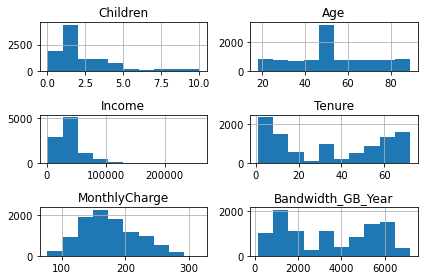

In [101]:
# Create histograms of important variables
df_stats[['Children', 'Age', 'Income', 'Tenure', 'MonthlyCharge','Bandwidth_GB_Year']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()
# plt.close()


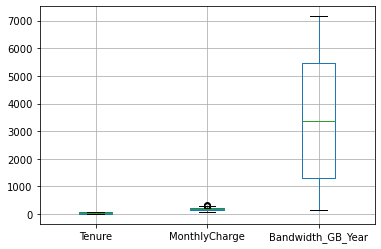

In [102]:
# Create a boxplot of user duration, payment & usage variables
df_stats.boxplot(['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
plt.savefig('churn_boxplots.jpg')

<AxesSubplot:>

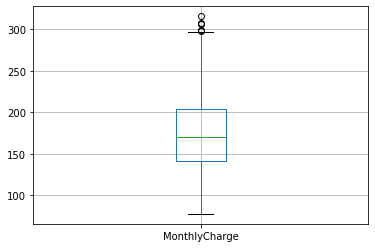

In [70]:
df_stats.boxplot(['MonthlyCharge'])


C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


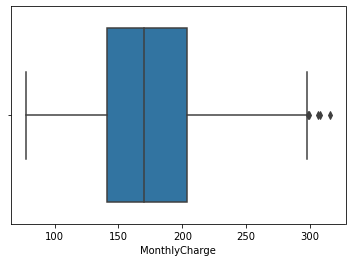

In [71]:
# Let's see a Seaborn boxplot fee & bandwidth
sns.boxplot('MonthlyCharge', data = df_stats)
plt.show()


In [72]:
# Extract Clean dataset
df_stats.to_csv('churn_clean.csv')

In [73]:
churn_user = pd.read_csv('churn_clean.csv')

In [74]:
# Slice off all but last eleven service realted variables
data = churn_user.loc[:, 'Tenure':'Listening']
data.head()


,Tenure,MonthlyCharge,Bandwidth_GB_Year,Responses,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [75]:
#pca Import Scikit Learn PCA application
from sklearn.decomposition import PCA

In [76]:
# Normalize the data
churn_normalized = (data - data.mean()) / data.std()

In [77]:
# Select number of components to extract
pca = PCA(n_components = data.shape[1])


In [80]:
# Create a list of PCA names
churn_numeric = data[['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year','Responses',
'Fixes', 'Replacements', 'Reliability', 'Options',
'Respectfulness', 'Courteous', 'Listening']]
pcs_names = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11']
for i, col in enumerate(churn_numeric.columns):
    pcs_names.append('PC' + str(i + 1))
print(pcs_names)


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

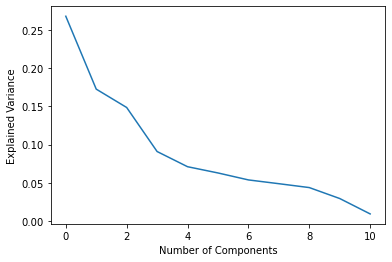

In [103]:
# Run the scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show();


In [88]:
# Extract the eigenvalues
cov_matrix = np.dot(churn_normalized.T, churn_normalized) / data.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]


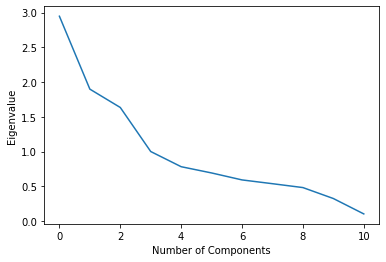

In [104]:
# Plot the eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show();